In [1]:
import pandas as pd
import seaborn as sns
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import scipy.stats as st
import seaborn as sns

import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier 
from sklearn import svm

In [2]:
finance_df = pd.read_csv("NFWBS_PUF_2016_data.csv")
association_df = finance_df.copy()

<AxesSubplot:xlabel='PPEDUC', ylabel='FWBscore'>

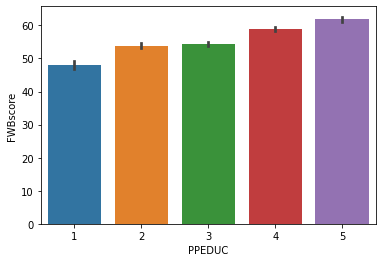

In [3]:
sns.barplot(data = finance_df, x = 'PPEDUC', y = 'FWBscore')

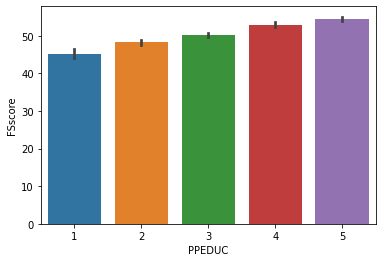

In [4]:
plot = sns.barplot(data = finance_df, x = 'PPEDUC', y = 'FSscore')

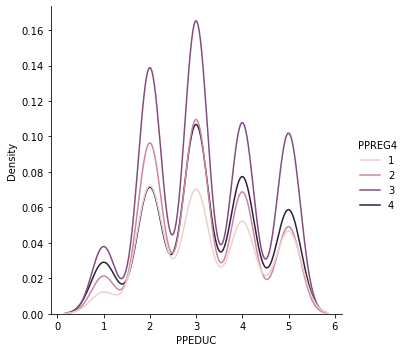

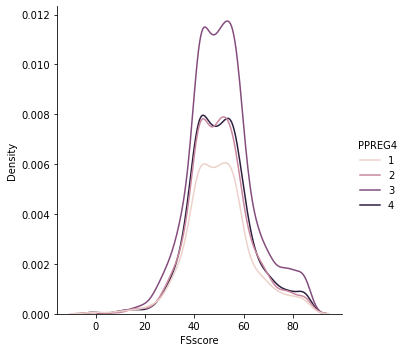

In [5]:
sns.displot(data = finance_df, x = 'PPEDUC', kind = 'kde', hue = 'PPREG4')
sns.displot(data = finance_df, x = 'FSscore', kind = 'kde', hue = 'PPREG4')

<AxesSubplot:xlabel='PPEDUC', ylabel='Count'>

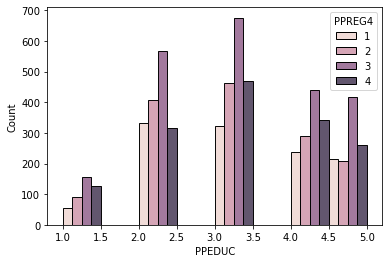

In [6]:
sns.histplot(data = finance_df, x = 'PPEDUC', hue = 'PPREG4' , multiple = 'dodge', bins = 8)

<AxesSubplot:xlabel='PPEDUC', ylabel='FSscore'>

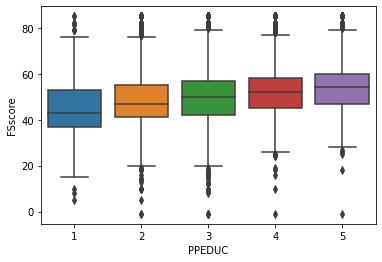

In [7]:
sns.boxplot(data = finance_df, x = 'PPEDUC', y = 'FSscore')


<AxesSubplot:xlabel='FSscore', ylabel='FWBscore'>

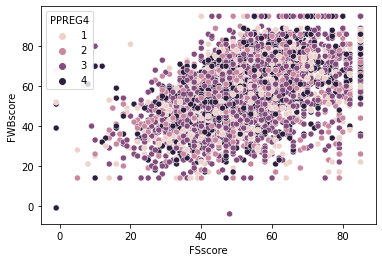

In [8]:
sns.scatterplot(data = finance_df, x = 'FSscore', y = 'FWBscore', hue = 'PPREG4')

<AxesSubplot:xlabel='FSscore', ylabel='finalwt'>

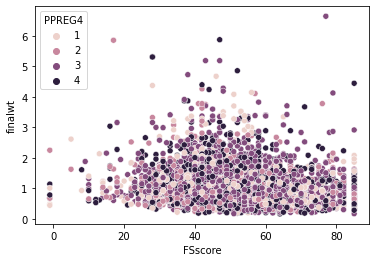

In [9]:
sns.scatterplot(data = finance_df, x = 'FSscore', y = 'finalwt', hue = 'PPREG4')
# do it again comparing something else to x

In [10]:
# Association of stress vs financial skill 

In [11]:
association_df['Skill Score'] = association_df['FSscore'].apply(lambda x: "Low" if x < 50.0 else "High")
association_df["Stress Level"] = association_df['DISTRESS'].apply(lambda x: "Low" if x < 4.0 else "High")
association_df


,PUF_ID,sample,fpl,SWB_1,SWB_2,SWB_3,FWBscore,FWB1_1,FWB1_2,FWB1_3,...,PPREG9,PPT01,PPT25,PPT612,PPT1317,PPT18OV,PCTLT200FPL,finalwt,Skill Score,Stress Level
0,10350,2,3,5,5,6,55,3,3,3,...,8,0,0,0,0,1,0,0.367292,Low,High
1,7740,1,3,6,6,6,51,2,2,3,...,3,0,0,0,0,2,0,1.327561,Low,Low
2,13699,1,3,4,3,4,49,3,3,3,...,9,0,0,0,1,2,1,0.835156,Low,Low
3,7267,1,3,6,6,6,49,3,3,3,...,7,0,0,0,0,1,0,1.410871,Low,Low
4,7375,1,3,4,4,4,49,3,3,3,...,4,0,0,1,0,4,1,4.260668,Low,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6389,11220,3,3,6,7,7,61,3,3,1,...,3,0,0,0,1,2,-5,0.522504,Low,Low
6390,13118,3,2,7,7,7,59,3,4,2,...,6,0,0,0,0,3,-5,1.015219,High,Low
6391,8709,1,3,5,6,6,59,3,4,3,...,2,0,0,0,0,2,0,1.136270,High,High
6392,8515,1,3,5,5,5,46,2,2,3,...,9,0,0,0,0,2,0,1.224941,High,High


Stress Level  High   Low
Skill Score             
High          1064  2254
Low           1419  1657
132.3247857081605 1.2703842881763267e-30 1 [[1288.48827025 2029.51172975]
 [1194.51172975 1881.48827025]]


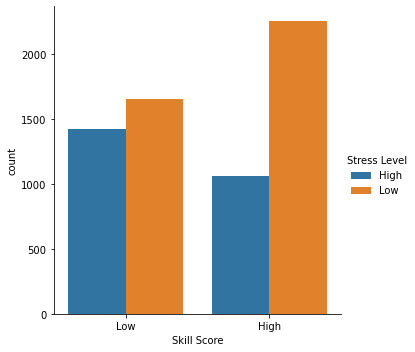

In [12]:
contingency = pd.crosstab(association_df["Skill Score"], association_df["Stress Level"])
print(contingency)

# Run a chi-square test
chisq, pval, dof, expected = st.chi2_contingency(contingency)
print(chisq, pval, dof, expected)

# Compare proportions of voter behavior with a bar plot
g = sns.catplot(data=association_df, x="Skill Score", hue="Stress Level", kind='count')


-0.2090730123002141 4.360416999747348e-64


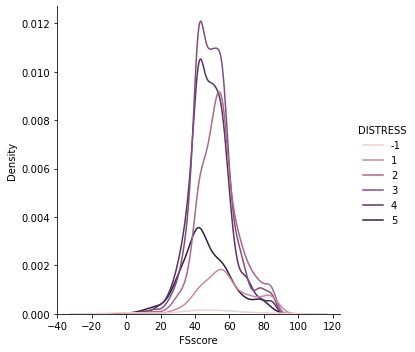

In [13]:
corr, pval = st.pointbiserialr(association_df["DISTRESS"], association_df["FSscore"])
print(corr, pval)

g = sns.displot(data=association_df, x='FSscore', hue="DISTRESS", kind="kde")

0.49466140521462887 0.0


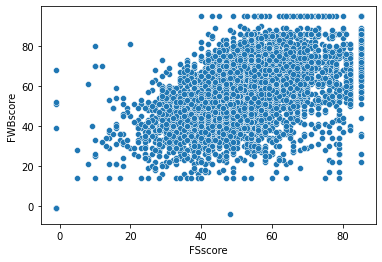

In [14]:
corr, pval = st.pearsonr(association_df['FSscore'], association_df['FWBscore'])
print(corr, pval)

plot = sns.scatterplot(data=association_df, x='FSscore', y='FWBscore')

In [15]:
class_label = 'Stress Level'

func = lambda x: 'High Stress' if x > 2.5 else "Low Stress"

finance_df['class_label'] = finance_df['DISTRESS'].apply(func)
finance_df

,PUF_ID,sample,fpl,SWB_1,SWB_2,SWB_3,FWBscore,FWB1_1,FWB1_2,FWB1_3,...,PPREG4,PPREG9,PPT01,PPT25,PPT612,PPT1317,PPT18OV,PCTLT200FPL,finalwt,class_label
0,10350,2,3,5,5,6,55,3,3,3,...,4,8,0,0,0,0,1,0,0.367292,High Stress
1,7740,1,3,6,6,6,51,2,2,3,...,2,3,0,0,0,0,2,0,1.327561,High Stress
2,13699,1,3,4,3,4,49,3,3,3,...,4,9,0,0,0,1,2,1,0.835156,Low Stress
3,7267,1,3,6,6,6,49,3,3,3,...,3,7,0,0,0,0,1,0,1.410871,Low Stress
4,7375,1,3,4,4,4,49,3,3,3,...,2,4,0,0,1,0,4,1,4.260668,High Stress
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6389,11220,3,3,6,7,7,61,3,3,1,...,2,3,0,0,0,1,2,-5,0.522504,Low Stress
6390,13118,3,2,7,7,7,59,3,4,2,...,3,6,0,0,0,0,3,-5,1.015219,Low Stress
6391,8709,1,3,5,6,6,59,3,4,3,...,1,2,0,0,0,0,2,0,1.136270,High Stress
6392,8515,1,3,5,5,5,46,2,2,3,...,4,9,0,0,0,0,2,0,1.224941,High Stress


In [16]:
# moving onto predictive modelling
x = finance_df.drop(columns = 'class_label')
y = finance_df['class_label']

x_train, x_test, y_train, y_test = train_test_split(x,y , test_size=0.20)

In [17]:
# decision tree 
clf = DecisionTreeClassifier() 
clf = clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

# accuracy 
acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 1.0
